In [281]:
import json
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from cali2events import convert_cali_to_json

In [282]:
def unpack_cali(dir):
    files_dir = dir
    
    cali_dir = os.path.join(files_dir, "cali")

    events_dir = os.path.join(files_dir, "events")
    os.makedirs(events_dir, exist_ok=True)

    unique_dir = os.path.join(files_dir, "unique-events")
    os.makedirs(unique_dir, exist_ok=True)

    metadata_dir = os.path.join(files_dir, "metadata")
    os.makedirs(metadata_dir, exist_ok=True)

    input_files = [os.path.join(cali_dir, filename) for filename in os.listdir(cali_dir) if filename.endswith(".cali")]

    if len(input_files) == 0:
        return {"message": "No input .cali file was found."}

    convert_cali_to_json(input_files, files_dir)

In [283]:
def get_data_from_json(filepath):
    assert os.path.isfile(filepath), f"No file found at {filepath}"
    try:
        with open(filepath) as f:
            return json.load(f)
    except FileNotFoundError as e:
        sys.exit(f"Could not find {filepath}")

In [284]:
unpack_cali('miniMD')

miniMD
{1: 'miniMD/unique-events/unique-events-1-depth_5.json', 0: 'miniMD/unique-events/unique-events-0-depth_5.json', 3: 'miniMD/unique-events/unique-events-3-depth_5.json', 2: 'miniMD/unique-events/unique-events-2-depth_5.json'}
Writing unique events for rank 1
<_io.TextIOWrapper name='miniMD/unique-events/unique-events-1-depth_5.json' mode='w' encoding='UTF-8'>
Writing unique events for rank 0
<_io.TextIOWrapper name='miniMD/unique-events/unique-events-0-depth_5.json' mode='w' encoding='UTF-8'>
Writing unique events for rank 3
<_io.TextIOWrapper name='miniMD/unique-events/unique-events-3-depth_5.json' mode='w' encoding='UTF-8'>
Writing unique events for rank 2
<_io.TextIOWrapper name='miniMD/unique-events/unique-events-2-depth_5.json' mode='w' encoding='UTF-8'>


Done. 12846 records written. Total 0.99s.


In [285]:
rank_data_df = pd.read_json('miniMD/events/events-2-depth_5.json')

In [286]:
rank_data_df

,pid,tid,name,eid,ftn_id,depth,type,ts,dur,path,kernel_type,rank
0,2,0,Kokkos::View::initialization [System::mass] vi...,9635,0,0,kokkos,0.000307,0.000009,,,2
1,2,0,Kokkos::View::initialization [System::mass] vi...,9636,0,0,kokkos,0.000433,0.000007,,,2
2,2,0,Kokkos::ViewFill-1D,9637,1,0,kokkos,0.000457,0.000005,,,2
3,2,0,Kokkos::View::initialization [Input::force_coe...,9638,2,0,kokkos,0.000473,0.000008,,,2
4,2,0,Kokkos::ViewCopy-1D,9639,3,0,kokkos,0.000486,0.000005,,,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3206,2,0,ForceLJNeigh::compute_energy,12841,55,0,other,3.082271,0.023625,,,2
3207,2,0,MPI_Allreduce,12842,18,0,collective,3.105905,0.000559,,,2
3208,2,0,4KinE,12843,56,0,other,3.106471,0.000121,,,2
3209,2,0,MPI_Allreduce,12844,18,0,collective,3.106596,0.000005,,,2


In [287]:
n_functions = rank_data_df.shape[0]
elapsed_time = rank_data_df.iloc[n_functions - 1]['ts'] + rank_data_df.iloc[n_functions - 1]['dur']
elapsed_time

np.float64(3.106647228)

In [288]:
rank_function_names = np.unique(rank_data_df['name'].to_numpy())

In [289]:
# create dataframe of MPI_Allreduce which has the timestamp when the function was called
allreduce_df = rank_data_df[rank_data_df['name'] == 'MPI_Allreduce']

# drop all columns except ts
allreduce_df = allreduce_df['ts']

In [290]:
# reset the index of the dataframe
allreduce_df = allreduce_df.reset_index(drop=True)

In [291]:
allreduce_df

0     0.008783
1     0.011740
2     0.011756
3     0.011762
4     0.011769
5     0.012000
6     0.184596
7     0.199794
8     0.200002
9     0.327735
10    0.344468
11    0.344618
12    0.637020
13    0.661864
14    0.662336
15    0.898837
16    0.923102
17    0.923311
18    1.243577
19    1.267234
20    1.267398
21    1.496861
22    1.521095
23    1.521616
24    1.839637
25    1.872805
26    1.873313
27    2.105522
28    2.129386
29    2.130300
30    2.448422
31    2.473628
32    2.474177
33    2.705432
34    2.729310
35    2.730227
36    3.048899
37    3.081191
38    3.082109
39    3.082255
40    3.105905
41    3.106596
Name: ts, dtype: float64

In [292]:
# scale the timestamps from 0 to 1
# allreduce_df = allreduce_df / elapsed_time

In [293]:
allreduce_df = pd.DataFrame(allreduce_df.to_numpy(), columns=['ts'])
allreduce_df

,ts
0,0.008783
1,0.011740
2,0.011756
3,0.011762
4,0.011769
5,0.012000
6,0.184596
7,0.199794
8,0.200002
9,0.327735


In [294]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(alpha=1.0, min_cluster_size=5, min_samples=5)

hdb.fit(allreduce_df.to_numpy().reshape(-1, 1))

HDBSCAN(min_samples=5)

In [295]:
hdb.labels_

array([2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1])

In [296]:
# create a new column in the dataframe to store the cluster labels
allreduce_df['cluster'] = hdb.labels_

In [297]:
allreduce_df

,ts,cluster
0,0.008783,2
1,0.011740,2
2,0.011756,2
3,0.011762,2
4,0.011769,2
5,0.012000,2
6,0.184596,3
7,0.199794,3
8,0.200002,3
9,0.327735,3


In [298]:
n_clusters = len(np.unique(allreduce_df['cluster']))

In [299]:
n_clusters

7

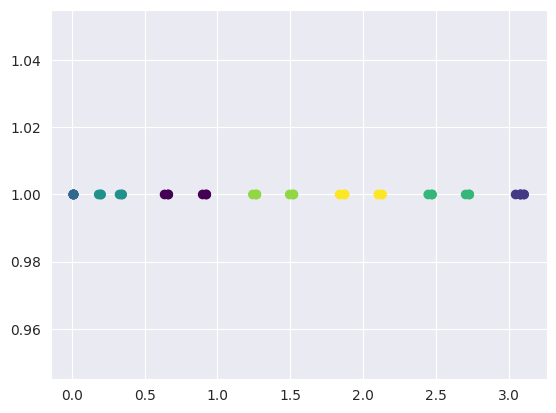

In [300]:
# plot points with different colors for each cluster
plt.scatter(allreduce_df['ts'], [1.0 for _ in range(allreduce_df['ts'].shape[0])], c=allreduce_df['cluster'], cmap='viridis')
plt.show()
